# Case assignment - Part 1 - Forecasting

## Data loading /prep

### Dataset for Residental Demand South Carolina

In [44]:
# Import pandas
import pandas as pd

# Import data
df_demand = pd.read_csv(r"C:\Users\jg\code\templat_reg_and_class\data\Residential Demand South Carolina.csv", header=None)

# Define column names and add them to the dataframe
column_names = ["datetime", "gas_demand_month"]
df_demand.columns = column_names

# Print info about dataframe
df_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   datetime          48 non-null     object
 1   gas_demand_month  48 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 896.0+ bytes


In [45]:
# Print the datamframe
df_demand

,datetime,gas_demand_month
0,01-Jan-13,5003
1,01-Feb-13,5216
2,01-Mar-13,4751
3,01-Apr-13,1586
4,01-May-13,824
5,01-Jun-13,497
6,01-Jul-13,440
7,01-Aug-13,487
8,01-Sep-13,472
9,01-Oct-13,815


### Dataset for temperature for South Carolina

In [46]:
# Import data
df_temp = pd.read_csv(r"C:\Users\jg\code\templat_reg_and_class\data\Temperatures South Carolina.csv", header=None)

# Define column names and add them to the dataframe
column_names = ["datetime", "temperature_day"]
df_temp.columns = column_names

# Print info about dataframe
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551 entries, 0 to 1550
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   datetime         1551 non-null   object 
 1   temperature_day  1551 non-null   float64
dtypes: float64(1), object(1)
memory usage: 24.4+ KB


In [47]:
# Print the datamframe
df_temp

,datetime,temperature_day
0,01-Jan-13,54.2930
1,02-Jan-13,53.9276
2,03-Jan-13,43.8584
3,04-Jan-13,42.4076
4,05-Jan-13,41.7938
...,...,...
1546,27-Mar-17,71.8160
1547,28-Mar-17,69.0260
1548,29-Mar-17,73.4000
1549,30-Mar-17,72.1580


## Statistics, plotting and more data prep

### Gas

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


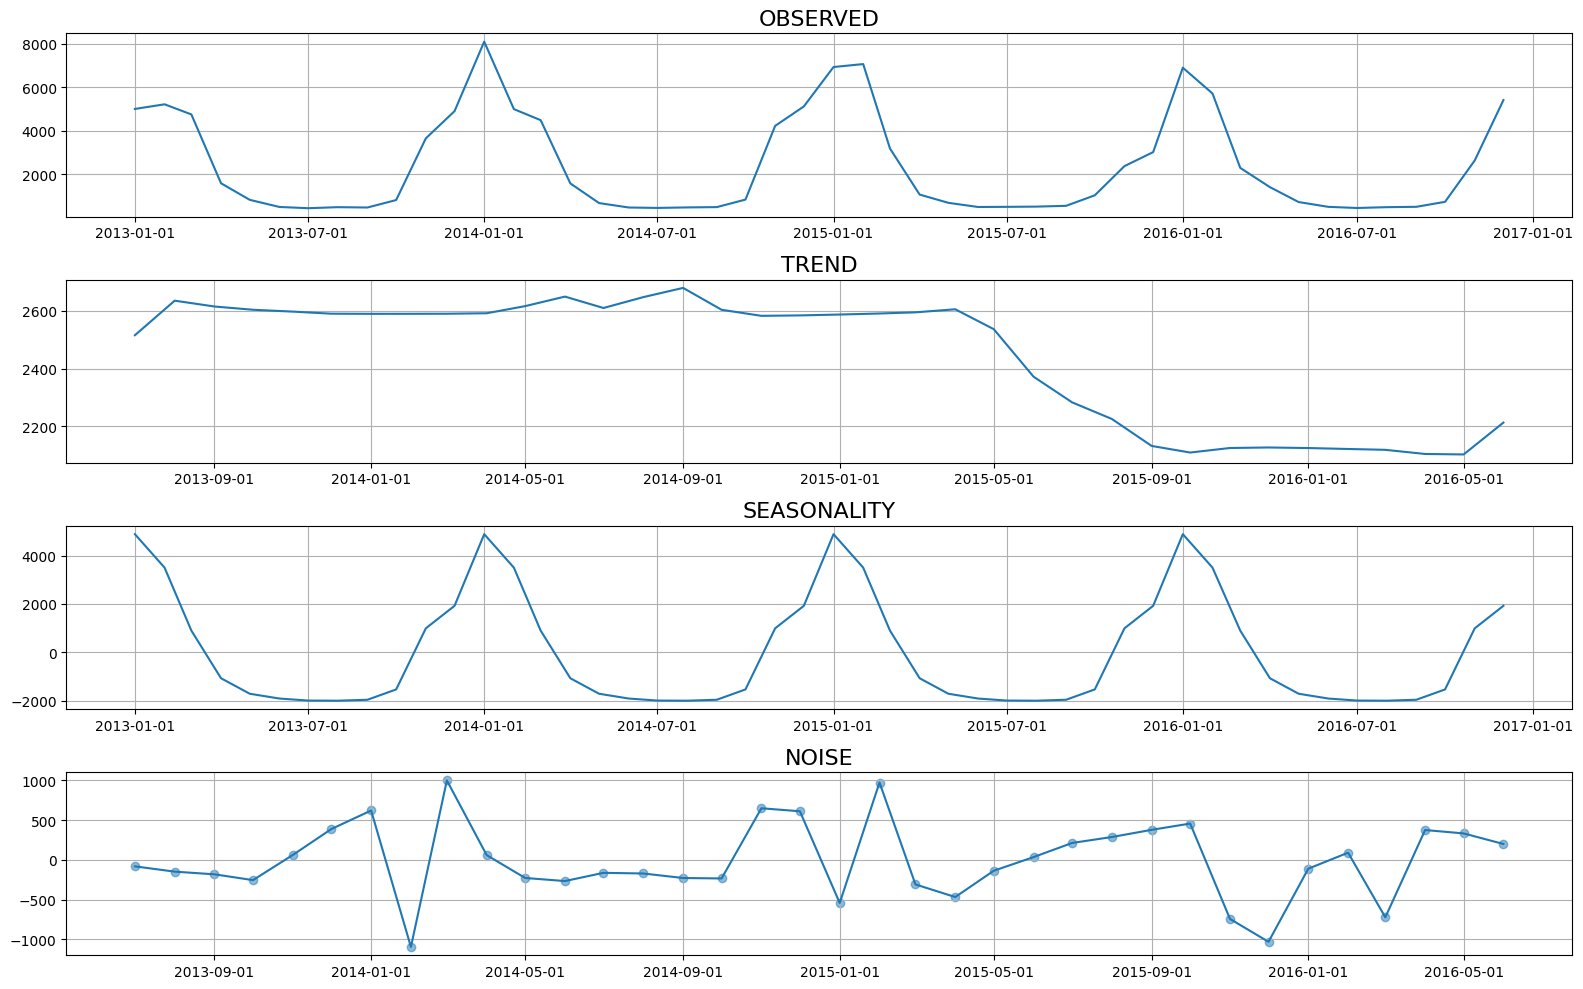

In [48]:
# Decompose Gas demand
%load_ext autoreload
from functions import decompose_ts
%autoreload 2
decompose_ts(df_demand,datetime_col="datetime", target_col= "gas_demand_month", samples="all", period=12)

The plot shows negative trend most notably from around 2015-05. An obvious seasonality with a bottom at every 7th month and a peak around every 1 month. The noise seems to be random and stationary.

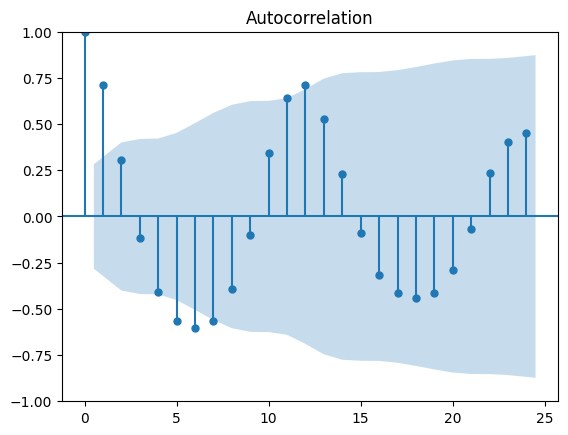

In [49]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_demand["gas_demand_month"].values, lags=24);

The ACF shows a positive correlation for lag 1 indicating that large values for gas demand in one month corresponds with large values for gas demand in the following month. It also shows a negative correlation for lag 5 and 6, which indicates that large values for gas demand in one month corresponds with small values for gas demand in months 5 and 6 afterwards.

In [50]:
# Look at general statistics for gas demand
df_demand.describe()

,gas_demand_month
count,48.000000
mean,2410.791667
std,2303.583212
min,440.000000
25%,502.000000
50%,1049.000000
75%,4553.000000
max,8096.000000


The statistics shows a high variation of the gas demand, and the smallest value to be 440 and the largest to be 8096.

In [51]:
# Convert datetime from object to datetime type
df_demand['datetime'] = pd.to_datetime(df_demand['datetime'])

# Set datetime as index
df_demand = df_demand.set_index(df_demand.datetime)

# Create new column values which are day, month and year.
df_demand['month'] = df_demand["datetime"].dt.month

# Drop datetime column
df_demand.drop('datetime', axis=1, inplace=True)

# Find the mean, median and std of gas_demand_month based on months
monthly_stats = df_demand.groupby('month')['gas_demand_month'].agg(['mean', 'median', 'std'])

# Drop month column
df_demand = df_demand.drop(columns=["month"])

# Print the resulting statistics
print(monthly_stats)

          mean  median          std
month                              
1      6732.00  6914.5  1280.238259
2      5747.25  5464.5   928.393729
3      3678.50  3835.0  1150.225920
4      1410.00  1494.0   243.732093
5       727.50   705.0    67.391889
6       491.75   496.5    13.425722
7       461.25   451.5    27.729347
8       490.75   487.0    15.713582
9       503.75   497.0    32.887434
10      854.00   825.5   126.714903
11     3220.50  3142.0   866.806591
12     4612.25  5010.0  1082.439028


By assessing the statistics for each individual month in the dataset it shows that the typical winter months and beginning of spring has the highest values for demand, but also the highest variance.

### Temperature

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


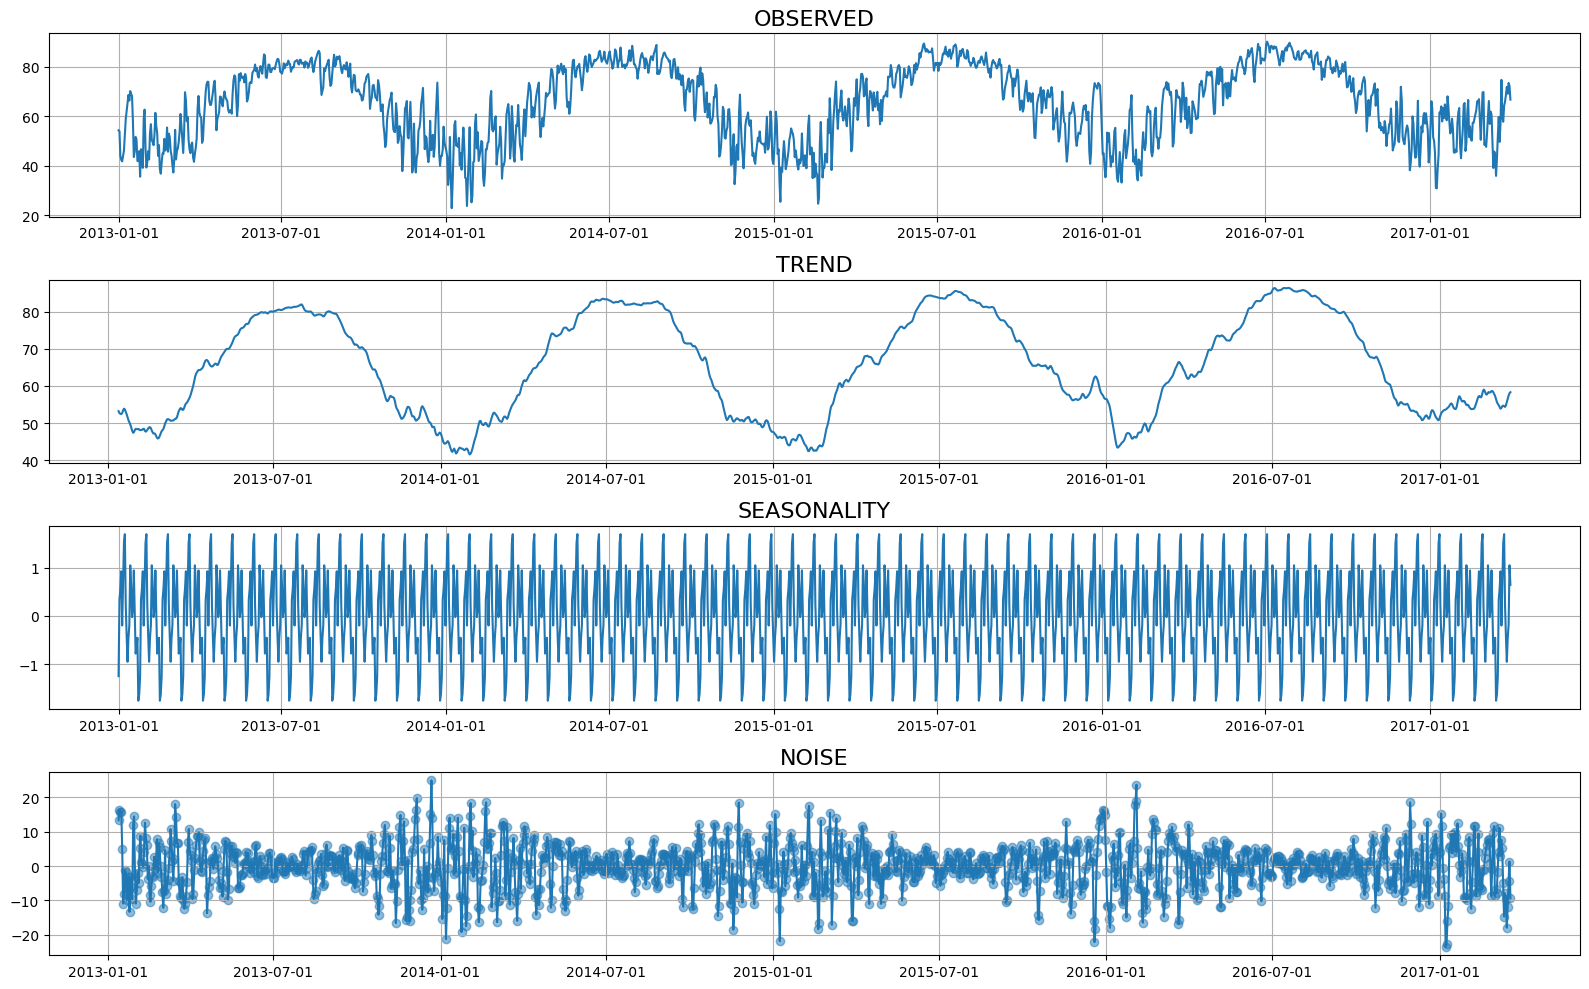

In [52]:
# Decompose temp
%load_ext autoreload
from functions import decompose_ts
%autoreload 2

decompose_ts(df_temp,datetime_col="datetime", target_col= "temperature_day", samples="all", period=24)

In [53]:
# Convert datetime from object to datetime type
df_temp['datetime'] = pd.to_datetime(df_temp['datetime'])

# Set datetime as index
df_temp = df_temp.set_index(df_temp.datetime)

# Create new column values which are day, month and year.
df_temp['year'] = df_temp["datetime"].dt.year
df_temp['month'] = df_temp["datetime"].dt.month
df_temp['day'] = df_temp["datetime"].dt.day

# Drop datetime column
df_temp.drop('datetime', axis=1, inplace=True)

# Create cut of date
cut_off_date = pd.to_datetime('2016-12-01')

# Get temp for forecasting
df_temp_future = df_temp[df_temp.index > cut_off_date]

# Cut of the dataframe at 2017-01-01 to match the demand
df_temp = df_temp[df_temp.index <= cut_off_date]

### Combine datasets

In [54]:
# Convert monthly values to daily in gas demand
df_demand = df_demand.resample('D').ffill()
# Merge the datasets based on the common date index
df_combined = df_temp.merge(df_demand, left_on='datetime', right_index=True, how='inner')
# Print dataframe
df_combined

,temperature_day,year,month,day,gas_demand_month
datetime,,,,,
2013-01-01,54.2930,2013,1,1,5003
2013-01-02,53.9276,2013,1,2,5003
2013-01-03,43.8584,2013,1,3,5003
2013-01-04,42.4076,2013,1,4,5003
2013-01-05,41.7938,2013,1,5,5003
...,...,...,...,...,...
2016-11-27,49.5680,2016,11,27,2633
2016-11-28,57.6680,2016,11,28,2633
2016-11-29,71.8520,2016,11,29,2633


In order to make daily forecasting of the gas demand the dataset is converted to daily frequency. This also makes it possible to make use of the daily temperature. However, this assumes that the gas demand remains more or less constant throughout each month and does not vary significantly on a daily basis.

## Forecasting

#### Base model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Start date for training: 2013-01-01 00:00:00
End date for training: 2016-08-01 00:00:00
Start date for test: 2016-08-02 00:00:00
End date for test: 2016-12-01 00:00:00


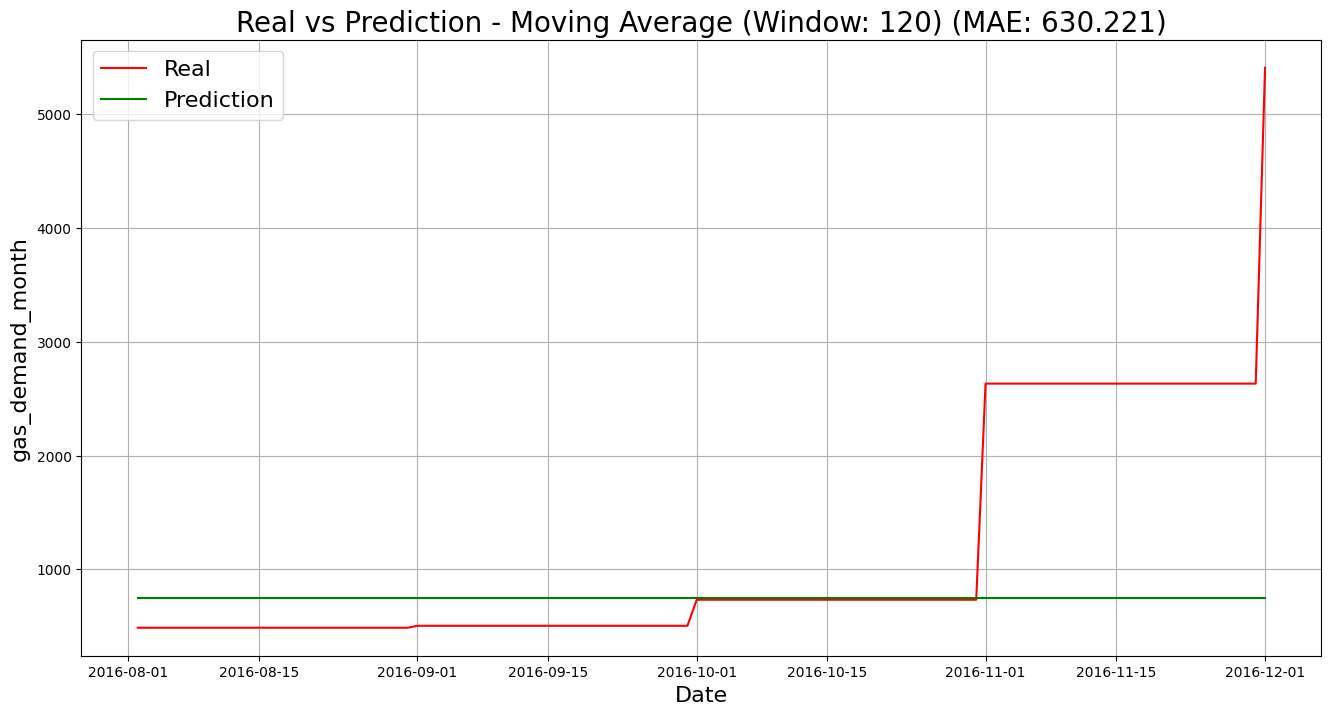

In [55]:
# Plot base model test values for 4 months.
%load_ext autoreload
from functions import train_time_series_with_avg
%autoreload 2
train_time_series_with_avg(df_combined, target_var="gas_demand_month", horizon=122, use_moving_avg=True,window=30*4)

Creating a baseline model which either uses the historical average or the moving average to predict values for a period of 4 months. The moving average is more capable of catching the non-stationary characteristics of the time series. Using MAE since it is gives a intuitive understanding of the results from the model. A more complex model should be able to gain a better MAE score.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Forecasting using moving average with window=120: 1132.325


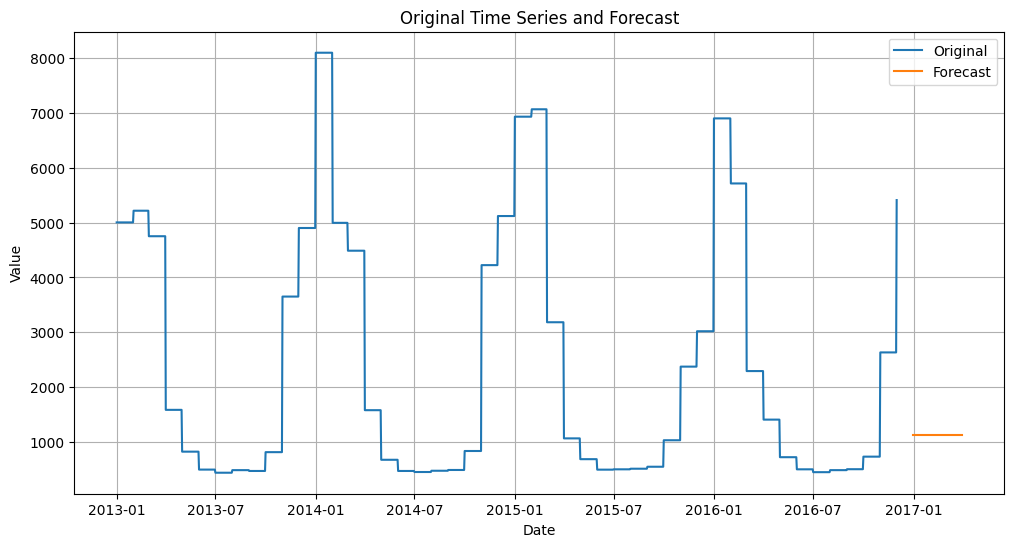

In [56]:
# Make forecast using baseline model
%load_ext autoreload
from functions import average_forecast
%autoreload 2
start_date = '2016-12-02'
end_date = '2017-03-31'
# Generate the forecast using the average method
forecast_df = average_forecast(df_demand, start_date, end_date, target="gas_demand_month", moving_avg_window=30*4)

#### Machine Learning

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


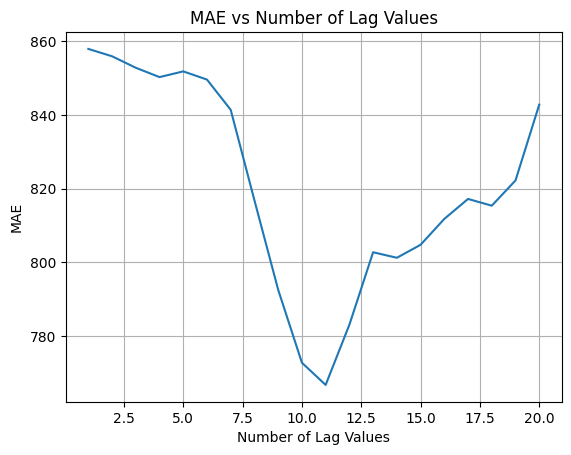

(11, 766.7900102109012)

In [57]:
# Finding the optimal lag
%load_ext autoreload
from functions import find_optimal_lags
%autoreload 2
find_optimal_lags(df_combined, target_col='gas_demand_month',feature_col='temperature_day', max_lags=20)

By training and testing a linear regression on different values of lag for the temperature, the optimal number of lag values is 11. This means that the temperature 11 days of daily temperature is most likely optimal for predicting a gas demand value.

In [58]:
%load_ext autoreload
from functions import create_lagged_matrix_for_train_test
%autoreload 2

# Drop year, month and day variable from df
df_combined = df_combined.drop(columns = ["month", "year", "day"])

# Define target and feature col
target_column = 'gas_demand_month'
feature_column = 'temperature_day'
lag = 11

X, y = create_lagged_matrix_for_train_test(df_combined, target_column, feature_column, lag)

# Display the shapes of X and y
print('X shape:', X.shape)
print('y shape:', y.shape)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
X shape: (1420, 11)
y shape: (1420,)


In [59]:
# Take a closer look at X and y
X

array([[65.5178, 62.213 , 58.865 , ..., 43.8584, 53.9276, 54.293 ],
       [68.558 , 65.5178, 62.213 , ..., 42.4076, 43.8584, 53.9276],
       [66.2792, 68.558 , 65.5178, ..., 41.7938, 42.4076, 43.8584],
       ...,
       [57.668 , 49.568 , 50.036 , ..., 46.184 , 54.968 , 63.068 ],
       [71.852 , 57.668 , 49.568 , ..., 47.768 , 46.184 , 54.968 ],
       [66.578 , 71.852 , 57.668 , ..., 48.668 , 47.768 , 46.184 ]])

In [60]:
# Take a closer look at X and y
y

array([5003., 5003., 5003., ..., 2633., 2633., 2633.])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


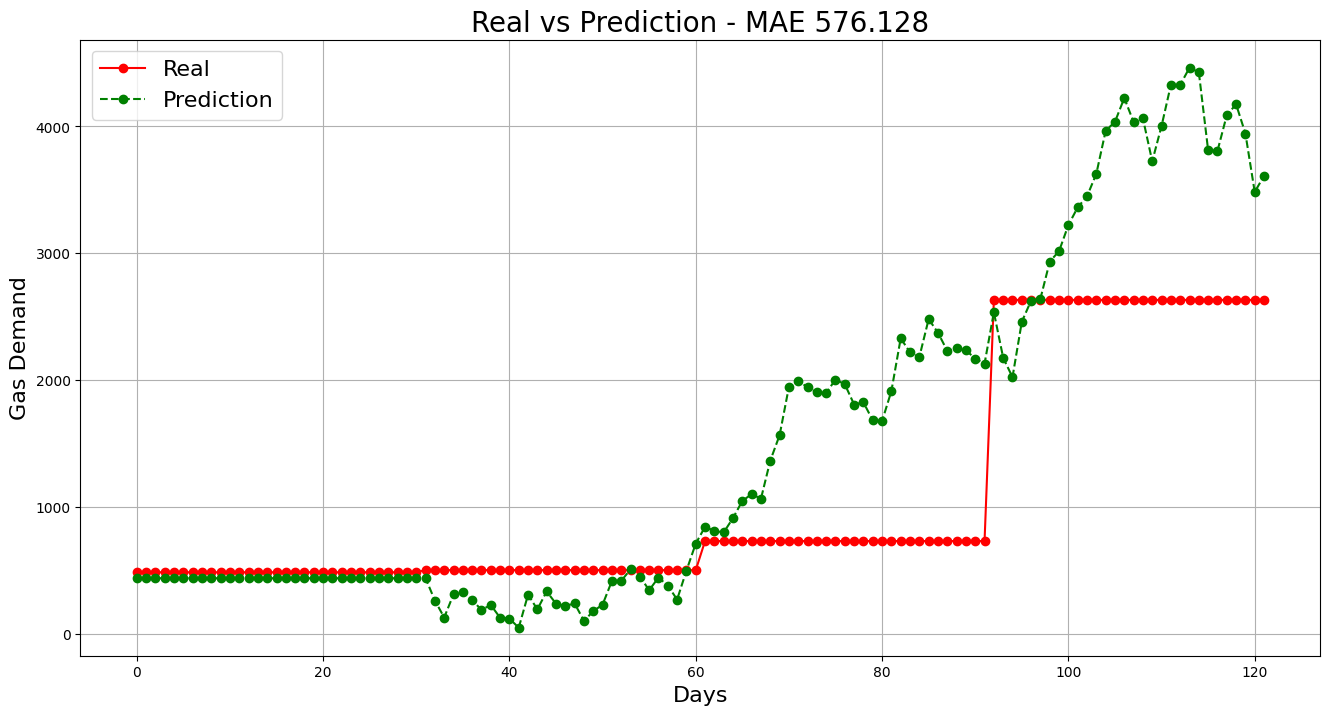

In [61]:
# Train and test on using Linear Regression on 4 months
%load_ext autoreload
from functions import train_time_series_with_linreg
%autoreload 2
model, mae, predictions  = train_time_series_with_linreg(X,y,horizon=122)

When modeling a problem a common approach is to begin with a fairly simple model and potentially work towards a more complex model if necessary. A linear regression was thus chosen for this task as it is a fairly easy and efficient model.However, it thus assumes a linear relationship between the temperature and gas demand for each day, which is not necessary the case. It can still provide reasonable approximation. More complex model as ARIMA, SARIMA or Prophet can be used if there are a more complex non-linear relationship. The model seems to capture the dynamic of the gas demand as it starts of with fairly low values in August and increases towards December. It also seems to follow the negative trend as it peaks around 5000, which is lower than the other peaks. The model also gained a lower MAE than the baseline model. However, the model predicted negative values which indicates that it has problem capturing the signal i the time series. Values that are predicted to be less than 0 is thus mapped to the lowest observed value (440).

In [63]:
# Create lagged values for future temp values
%load_ext autoreload
from functions import create_lagged_matrix_for_forecast
%autoreload 2
df_temp_future_lag = create_lagged_matrix_for_forecast(df_temp_future,column="temperature_day", lag=11)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
# Look at df for future forecast
df_temp_future_lag

,Lag1,Lag2,Lag3,Lag4,Lag5,Lag6,Lag7,Lag8,Lag9,Lag10,Lag11
datetime,,,,,,,,,,,
2016-12-13,59.936,46.472,41.162,38.210,49.226,54.626,56.246,54.752,52.088,48.668,49.784
2016-12-14,57.020,59.936,46.472,41.162,38.210,49.226,54.626,56.246,54.752,52.088,48.668
2016-12-15,48.326,57.020,59.936,46.472,41.162,38.210,49.226,54.626,56.246,54.752,52.088
2016-12-16,43.268,48.326,57.020,59.936,46.472,41.162,38.210,49.226,54.626,56.246,54.752
2016-12-17,43.610,43.268,48.326,57.020,59.936,46.472,41.162,38.210,49.226,54.626,56.246
...,...,...,...,...,...,...,...,...,...,...,...
2017-03-27,68.558,65.858,64.184,57.758,59.684,74.642,57.326,49.658,59.684,51.926,43.016
2017-03-28,71.816,68.558,65.858,64.184,57.758,59.684,74.642,57.326,49.658,59.684,51.926
2017-03-29,69.026,71.816,68.558,65.858,64.184,57.758,59.684,74.642,57.326,49.658,59.684


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\jg\code\templat_reg_and_class\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


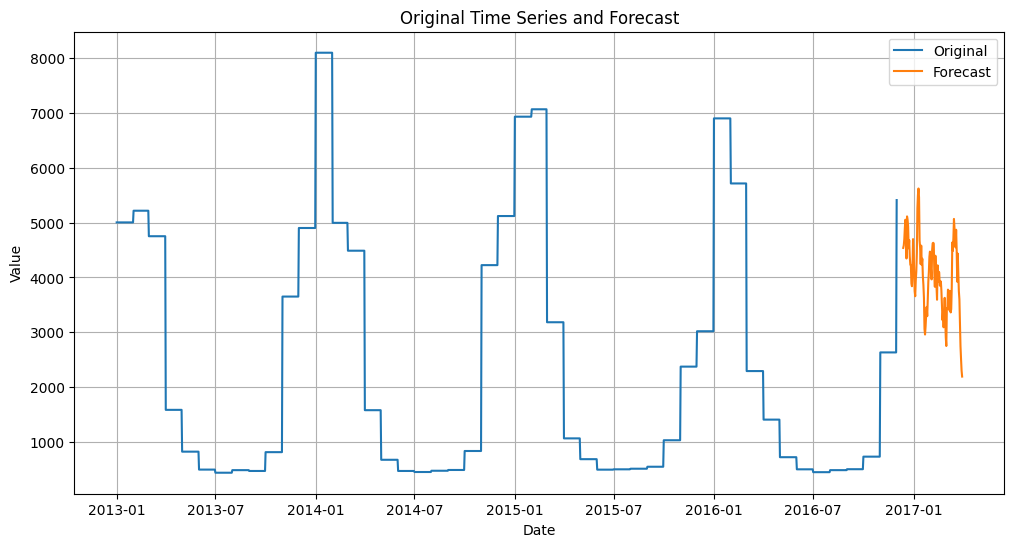

In [65]:
%load_ext autoreload
from functions import plot_forecast
%autoreload 2

# Make forecast values using the trained linear regression model
forecast_values = model.predict(df_temp_future_lag)

# Define start and end date
start_date = '2016-12-13'
end_date = '2017-03-31'

# Create df for forecast values
index = pd.date_range(start=start_date, end=end_date, freq='d')
forecast_df = pd.DataFrame(index=index)
forecast_df['Forecast'] = forecast_values

# Generate the forecast
forecast_df = plot_forecast(df_demand,forecast_df,target='gas_demand_month')

In [70]:
# Get statistics from predictions
import numpy as np
forecast_avg = np.average(forecast_values)
forecast_max = np.max(forecast_values)
forecast_min = np.min(forecast_values)
forecast_std = np.std(forecast_values)

print("Average for forecast is: ", forecast_avg)
print("Max for forecast is: ", forecast_max)
print("Min for forecast is: ", forecast_min)
print("Std for forecast is: ", forecast_std)

Average for forecast is:  4046.13888403876
Max for forecast is:  5621.180025613073
Min for forecast is:  2192.6066444491153
Std for forecast is:  674.682821555289
